In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
#%matplotlib notebook
import statistics

In [5]:
def mypgmread(filename):
    with open(filename,'rb') as f:#write binary olarak dosyayı açtım, bu sayede pgm dosyasına binary yazabiliyorum.
        magic_word = f.readline().strip().decode() #Magicword. Strip metodu ile stringin başında ve sonundaki boşlukları kaldırıyoruz.
        comment = '#'
        f_content = f.readline().decode()
        while(f_content[0] == '#'):#Yorum satırlarını ayırt etmek için.
            f_content = f.readline()
#split metodu default olarak stringi boşluklardan ayırır. kelime kelime listeler.
        [width,height] = f_content.split()
        width = int(width)
        height = int(height)
        maxval = f.readline().decode()
        maxval = int(maxval)
        #print(magic_word)
        #print(f'width: {width}, height: {height}')
       # print(maxval)
        i = 0
        j = 0
        imgValue = [[0 for i in range(width)] for j in range(height)]
        byte = f.read(1)
        counter = 0
        while(counter != width*height):
            #print(f'i = {i}\nj = {j}')
            imgValue[i][j] = ord(byte)
            #print(f'byte {ord(byte)}')
            j += 1
            counter += 1
            if(j == width):
                i += 1
                j = 0
            byte = f.read(1)
    return magic_word,width,height,maxval,imgValue

In [11]:
def my2Dfft(data,width,height):
    data_fft = np.array([[0 for i in range(width)] for j in range(height)],dtype=np.complex_)
    last_data_fft = np.array([[0 for i in range(width)] for j in range(height)],dtype=np.complex_)
    for i in range(height):
        data_fft[i] = np.fft.fft(data[i])

    for j in range(width):
        last_data_fft[:,j] = np.fft.fft(data_fft[:,j])
    
    return last_data_fft
    

In [12]:
def myShiftCenter(data,width,height):
    temp = np.array([[0 for i in range(width)] for j in range(height)])
    for i in range(height):
        for j in range(width):
            temp[i][j] = data[i][j] * (-1)**(i+j)
    return temp

In [13]:
def my2Difft(data,width,height):
    temp = np.array([[0 for i in range(width) for j in range(height)]])
    temp = my2Dfft(np.conjugate(data),width,height)
    
    
    return temp
    

In [107]:
def calculateHistogram(data,width,height,maxval):
    histogramData = np.array([0 for i in range(maxval+1)],dtype=float)
    for i in range(height):
        for j in range(width):
            histogramData[data[i][j]] += 1 #[data[i][j]] ile o piksel kaç ise o indeksteki değeri 1 arttırarak hangi pikselden kaç tane olduğunun verisi tutuluyor.
    #histogramData = histogramData/(width*height) #normalize edildi
    return histogramData

    

In [45]:
def normalization(data,value):
    height = len(data)
    width = len(data[0])
    normalized = np.array([[0 for i in range(width)] for j in range(height)])
    minimum = np.min(data)
    maximum = np.max(data)
    normalized = value*(data - minimum)/(maximum-minimum)
    return normalized        
    

1114
834


Text(0.5, 1.0, 'Original Image')

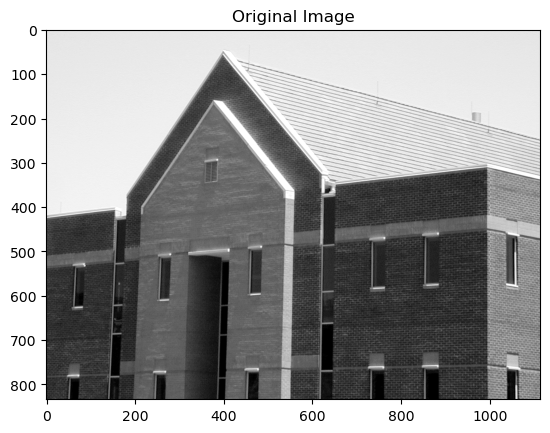

In [89]:
mw,width,height,maxval,img = mypgmread("fig1016.pgm")
plt.imshow(img,cmap="gray",vmin=0,vmax=255)
print(width)
print(height)
plt.title("Original Image")

In [84]:
def mySobel(img,m,n,mask):
    height,width = np.array(img).shape
    print(height)
    print(width)
    #sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    #sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    
    temp = img
    a=(m-1)/2
    b=(n-1)/2
    filteredImg = np.array([[0 for i in range(width)] for j in range(height)],dtype=float)
    
    new_column = np.array([0 for i in range(height)]).reshape(height,1)
    for i in range(int(b)*2):
        temp = np.hstack((temp, new_column))
    
    new_width = len(temp[0])
    new_row = np.array([0 for j in range(new_width)])
    for j in range(int(a)*2):
        temp = np.vstack((temp,new_row))

    for i in range(int(a)):
        temp = np.roll(temp, shift=1, axis=0)
        temp = np.roll(temp, shift=1, axis=1)
    
    for i in range(height):
        for j in range(width):
            sum = 0
            for r in range(0,m,1):
                for s in range(0,n,1):
                    sum = sum + mask[r][s]*temp[i+r][j+s]
            filteredImg[i][j] = abs(sum)

    return filteredImg

834
1114


Text(0.5, 1.0, 'Sobel gy görüntüsü')

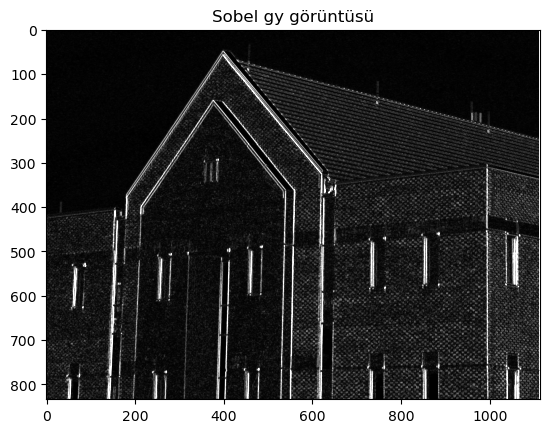

In [85]:
sobel_y = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
imgSobel_y = mySobel(img,3,3,sobel_y)
plt.imshow(imgSobel_y,cmap="gray",vmin=0,vmax=255)
plt.title("Sobel gy görüntüsü")

834
1114


Text(0.5, 1.0, 'Sobel gx görüntüsü')

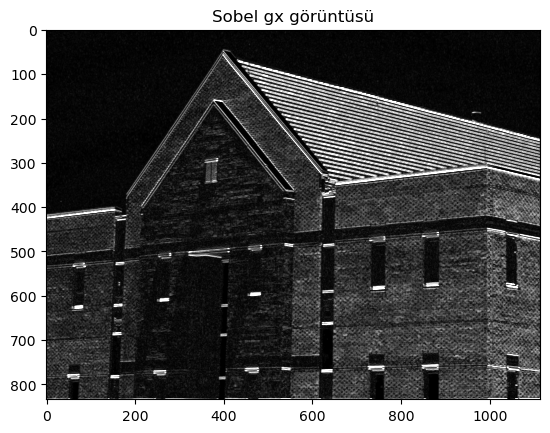

In [86]:
sobel_x = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
imgSobel_x = mySobel(img,3,3,sobel_x)
plt.imshow(imgSobel_x,cmap="gray",vmin=0,vmax=255)
plt.title("Sobel gx görüntüsü")

Text(0.5, 1.0, 'Sobel |gx| + |gy| görüntüsü')

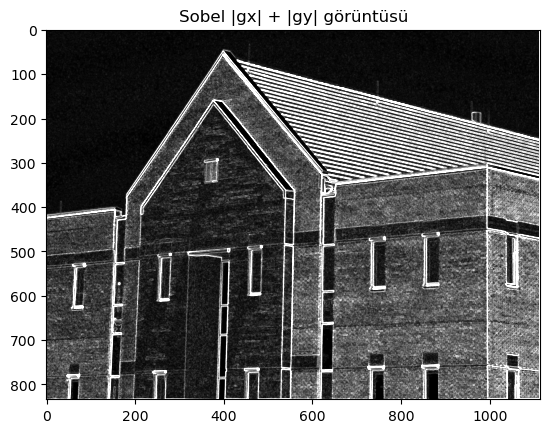

In [87]:
imgSobel = imgSobel_x + imgSobel_y
plt.imshow(imgSobel,cmap="gray",vmin=0,vmax=255)
plt.title("Sobel |gx| + |gy| görüntüsü")

In [88]:
def myImgCorrelation(width,height,img,m,n):
    mask = np.array([[1 for i in range(n)] for j in range(m)])
    temp = img
    a=(m-1)/2
    b=(n-1)/2
    filteredImg = np.array([[0 for i in range(width)] for j in range(height)])
    
    #Matrisi m ve n değerlerine göre 0 lar ile genişletiyoruz.
    new_column = np.array([0 for i in range(height)]).reshape(height,1)#oluşturulan vektörü sütun vektörü haline getiriyorum.
    for i in range(int(b)*2):#matrisin her tarafı sıfırlarla kaplanması için sütundan ve satırdan b değerinin 2 katı kadar koymalıyız
        temp = np.hstack((temp, new_column))
    
    new_width = len(temp[0])#yukarıda matrise sütun eklendiği için matrisin genişliği değişti. Bu yeni genişliği elde ediyorum.
    new_row = np.array([0 for j in range(new_width)])#Yeni genişlik uzunluğunda 0 satır vektörünü oluşturuyorum.
    for j in range(int(a)*2):#Aynı şekilde matrisin hem üstüne hem altına 0'lar gelmesi için a*2 yapıyorum.
        temp = np.vstack((temp,new_row))
    #Yukarıda eklenen satır ve sütunlar matrisin altına ve sağına eklendiği için tam istediğimiz forma henüz ulaşmamıştır. Bunu
    #istediğimiz forma sokmak için elimizdeki asıl değerleri hem alta hem de sağa doğru o yönde eklediğimiz vektör sayısının
    #yarısı kadar kaydırmamız gerekiyor. Örneğin sağa 2 ve alta 2 vektör eklediysek 1 sağa 1 de aşağı kaydırarak asıl orijinal
    #matrisi merkez kısma yerleştirmiş ve etrafını sıfırlarla kaplamış oluyoruz.
    for i in range(int(a)):
        temp = np.roll(temp, shift=1, axis=0)
        temp = np.roll(temp, shift=1, axis=1)
        
    for i in range(height):
        for j in range(width):
            sum = 0
            for r in range(0,m,1):
                for s in range(0,n,1):
                    sum = sum + mask[r][s]*temp[i+r][j+s]#Artık elimizde padding yapılmış bir matris olduğu için maskeyi
                    #özel şartlar koymadan genişletilmiş matris üstünde gezdirip average işlemini yapabiliriz.
            filteredImg[i][j] = sum/9
    return filteredImg
                    

Text(0.5, 1.0, "5x5'lik ortalama filtresiyle orijinal görüntünün yumuşatılmış hali")

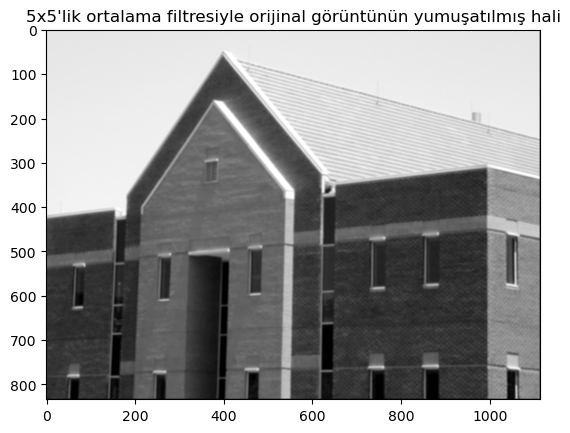

In [94]:
smoothedImg = myImgCorrelation(width,height,img,5,5) 
smoothedImgn = normalization(smoothedImg,255)
plt.imshow(smoothedImgn,cmap="gray",vmin=0,vmax=255)
plt.title("5x5'lik ortalama filtresiyle orijinal görüntünün yumuşatılmış hali")

834
1114


Text(0.5, 1.0, 'Yumuşatılmış görüntünün üstüne Sobel gy görüntüsü')

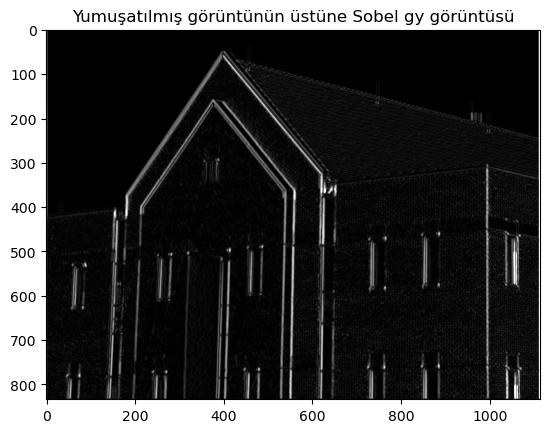

In [96]:
imgSobel_y = mySobel(smoothedImgn,3,3,sobel_y)
plt.imshow(imgSobel_y,cmap="gray",vmin=0,vmax=255)
plt.title("Yumuşatılmış görüntünün üstüne Sobel gy görüntüsü")

834
1114


Text(0.5, 1.0, 'Yumuşatılmış görüntünün üstüne uygulanmış Sobel gx görüntüsü')

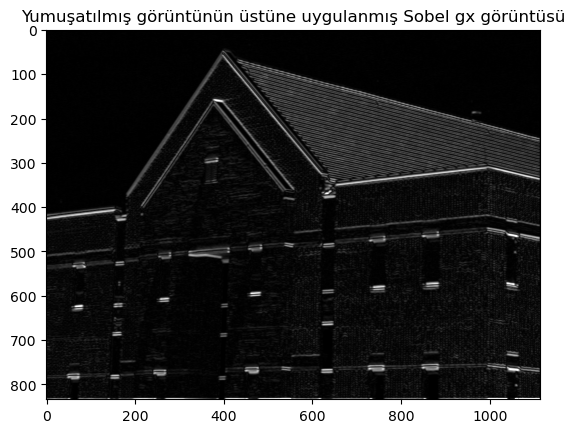

In [98]:
imgSobel_x = mySobel(smoothedImgn,3,3,sobel_x)
plt.imshow(imgSobel_x,cmap="gray",vmin=0,vmax=255)
plt.title("Yumuşatılmış görüntünün üstüne uygulanmış Sobel gx görüntüsü")

Text(0.5, 1.0, 'Sobel |gx| + |gy| görüntüsü (Yumuşatılmış versiyon)')

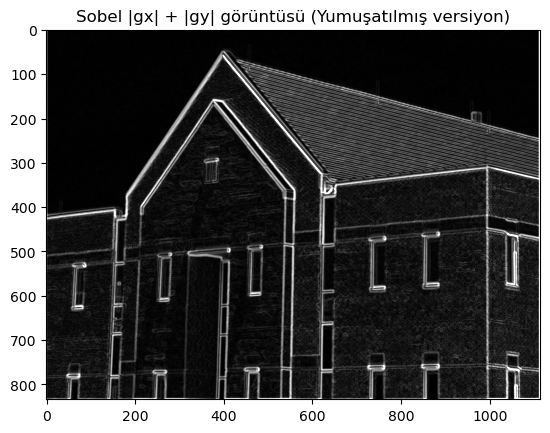

In [99]:
imgSobel = imgSobel_x + imgSobel_y
plt.imshow(imgSobel,cmap="gray",vmin=0,vmax=255)
plt.title("Sobel |gx| + |gy| görüntüsü (Yumuşatılmış versiyon)")

## 2.soru Basic Global Thresholding

798
958


Text(0.5, 1.0, 'Original Image')

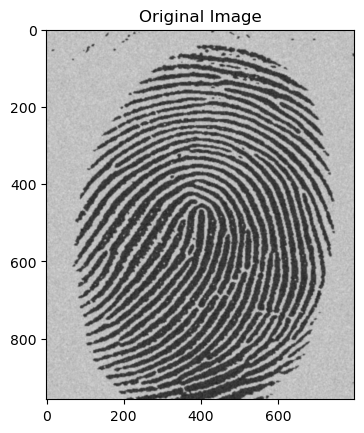

In [101]:
mw,width,height,maxval,img = mypgmread("fig1038.pgm")
plt.imshow(img,cmap="gray",vmin=0,vmax=255)
print(width)
print(height)
plt.title("Original Image")

Text(0, 0.5, 's')

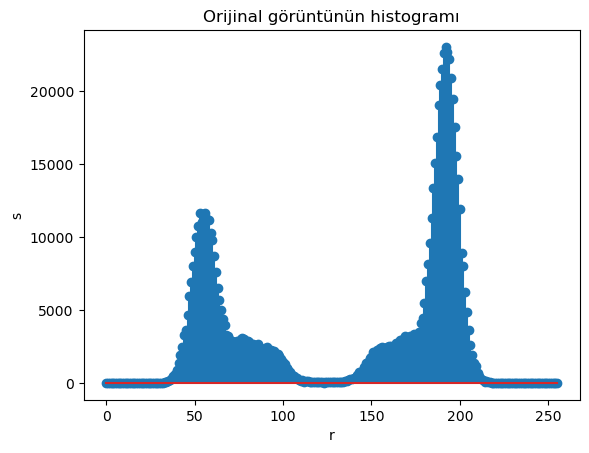

In [134]:
histogramVal = calculateHistogram(img,width,height,maxval)
t = np.arange(maxval+1)
plt.figure()
plt.stem(t,histogramVal)
plt.title("Orijinal görüntünün histogramı")
plt.xlabel("r")
plt.ylabel("s")

In [130]:
dizi = [i for i in range(10)]
dizi[:]
np.round(139.4)

139.0

In [166]:
def myBGT(img,histogram):
    height,width = np.array(img).shape
    newImg = np.zeros([height,width],dtype=int)
    T = int(np.round(np.mean(img)))
    deltaT = 0
    G1 = histogram[:T]
    G2 = histogram[T:]
    m1 = np.sum(np.array([G1[i]*i for i in range(T)]))/np.sum(np.array([G1[i] for i in range(T)]))
    m2 = np.sum(np.array([G2[i]*(i+T) for i in range(255-T)]))/np.sum(np.array([G2[i] for i in range(255-T)]))
    newT = int(np.round((m1+m2)/2))
    while(newT-T == deltaT):
        T=newT
        G1 = histogram[:T]
        G2 = histogram[T:]
        m1 = np.sum(np.array([G1[i]*i for i in range(T)]))/np.sum(np.array([G1[i] for i in range(T)]))
        m2 = np.sum(np.array([G2[i]*(i+T) for i in range(255-T)]))/np.sum(np.array([G2[i] for i in range(255-T)]))
        newT = int(np.round((m1+m2)/2))
    
    for i in range(height):
        for j in range(width):
            if(img[i][j]>newT):
                newImg[i][j] = 255
            else:
                newImg[i][j] = 0
                
    return newT,newImg
    

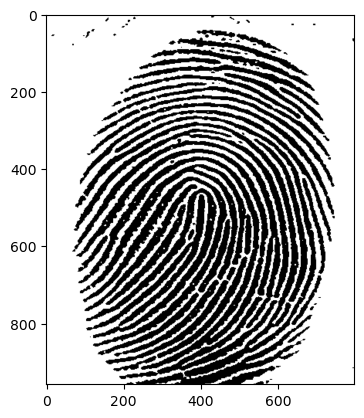

In [167]:
T,newImg = myBGT(img,histogramVal)
plt.imshow(newImg,cmap="gray",vmin=0,vmax=255)

In [161]:
T

126

In [162]:
np.zeros([3,2],dtype=int)

array([[0, 0],
       [0, 0],
       [0, 0]])